In [340]:
import pandas as pd													# data manipulation
import matplotlib.pyplot as plt												# graphs
import seaborn as sns													# graphs
import numpy as np													# graphs
from scipy.stats import norm												# statistics
from sklearn.preprocessing import StandardScaler									# statistics
from scipy import stats													# statistics
from math import *													# advance calculation	
from matplotlib import cm												# graphs
import sys														# system functions
import warnings														# indicating warnings
warnings.filterwarnings('ignore')											# ignore by default
from matplotlib.ticker import LinearLocator										# graphs
pd.set_option('display.max_columns', None)										# show all columns
pd.set_option('display.max_rows', 3000)											# show all rows
np.set_printoptions(threshold=sys.maxsize)										# show arrays full
pd.set_option("display.max_colwidth", -1)										# show a complete text in a cell
pd.set_option('display.precision',6)											# precision decimals pd
np.set_printoptions(precision=3)											# precision decimals np
from xlsxwriter.workbook import Workbook										# CSV writing
import csv														# CSV writing	
import xgboost as xgb													# prediction
import pickle														# prediction	
import sklearn														# mutual information
import statsmodels.api as sm												# coefficient
from sklearn.ensemble import RandomForestClassifier									# random forest
from sklearn import linear_model											# linear regression
import pymysql														# MySql connection
import datetime														# time conversions
import random														# randomchoice
import math as math													# maths
import statistics													# statistics
import glob														# paths and files management
import matplotlib.image as mpimg											# matplot image

In [335]:
# Price analysis comparison, Uber-Lyft taxi from 26th of November to 18th of December 2011, at Boston

df = pd.read_csv('df_comparison.csv')

In [336]:
df['timestamp'] = pd.to_datetime(pd.to_datetime(df['timestamp'], unit='s').astype(str).str[:19])
df['WeekDay'] = df['timestamp'].dt.day_name()
df.drop( df.loc[df['price'].isnull()].index ,inplace=True)
df['distance'] = round(df['distance'] * 1.60934,2)
df['apparentTemperature'] = round((df['apparentTemperature']- 32) * 5/9,2)
df['precipIntensity'] = round(df['precipIntensity']*25.4,2)
df['precipProbability'] =  df['precipProbability']*100
df['humidity'] = df['humidity']*100
df['windSpeed'] = round(df['windSpeed']*1.852,0)
df['visibility'] = round(df['visibility']*1.609,0)
df['apparentTemperatureHighTime'] = pd.to_datetime(pd.to_datetime(df['apparentTemperatureHighTime'], unit='s').astype(str).str[:19])
df['apparentTemperatureLowTime'] = pd.to_datetime(pd.to_datetime(df['apparentTemperatureLowTime'], unit='s').astype(str).str[:19])
df['apparentTemperatureHigh'] = round((df['apparentTemperatureHigh']- 32) * 5/9,2)
df['apparentTemperatureLow'] = round((df['apparentTemperatureLow']- 32) * 5/9,2)
df['sunriseTime'] = pd.to_datetime(pd.to_datetime(df['sunriseTime'], unit='s').astype(str).str[:19])
df['sunsetTime'] = pd.to_datetime(pd.to_datetime(df['sunsetTime'], unit='s').astype(str).str[:19])
df.drop(columns=['product_id','id','datetime','day','month','timezone','windGust','windGustTime','temperatureHigh','temperature'
,'temperatureLow','dewPoint','temperatureHighTime','temperatureLowTime','pressure','windBearing','cloudCover','uvIndex',
'visibility.1','ozone','moonPhase','precipIntensityMax','uvIndexTime', 'temperatureMin','temperatureMinTime', 'temperatureMax',
'temperatureMaxTime','apparentTemperatureMin', 'apparentTemperatureMinTime','apparentTemperatureMax', 
'apparentTemperatureMaxTime'], inplace=True)
df.columns = ['Time', 'Hour', 'Source', 'Destination', 'Taxi', 'n1', 'Fare', 'Distance(km)', 'SM', 'Lat',
       'Lon', 'Temp(c)', 'Summary1', 'Summary2', 'Rainfall(mm/h)', 'Precipitation(%)', 'Humidity(%)', 'WindSpeed(km/h)',
       'Visibility(km)', 'TempHigh(c)', 'TempHighTime','TempLow(c)', 'TempLowTime', 'Summary3','Sunrise', 'Sunset', 'WeekDay']
df.replace({'n1': {'Uber': ''}}, inplace=True, regex=True)
df['Service'] = df['Taxi'] + ' ' + df['n1']
df.drop(columns=['n1'], inplace=True)
df = df[['Time', 'WeekDay', 'Hour', 'Source', 'Destination', 'Distance(km)','Taxi', 'Service', 'Fare', 'SM', 'Lat', 'Lon',
         'Summary1', 'Summary2', 'Summary3','Temp(c)', 'TempHigh(c)', 'TempHighTime', 'TempLow(c)', 'TempLowTime',
         'Rainfall(mm/h)', 'Precipitation(%)', 'Humidity(%)', 'WindSpeed(km/h)', 'Visibility(km)','Sunrise', 'Sunset']]
df = df.sort_values(['Time', 'Source','Destination'], ascending=[True, True, True])
df = df.reset_index(drop=True)

#Lyft services identified
df.at[ df.loc[df['Service'] == 'Lyft Shared'].index ,'Service'] = 'Lyft 0'
df.at[ df.loc[df['Service'] == 'Lyft Lyft'].index ,'Service'] = 'Lyft 1'
df.at[ df.loc[df['Service'] == 'Lyft Lyft XL'].index ,'Service'] = 'Lyft 1.5'
df.at[ df.loc[df['Service'] == 'Lyft Lux'].index ,'Service'] = 'Lyft 2'
df.at[ df.loc[df['Service'] == 'Lyft Lux Black'].index ,'Service'] = 'Lyft 3'
df.at[ df.loc[df['Service'] == 'Lyft Lux Black XL'].index ,'Service'] = 'Lyft 3.5'

#Uber services identifies
df.at[ df.loc[df['Service'] == 'Uber Pool'].index ,'Service'] = 'Uber 0'
df.at[ df.loc[df['Service'] == 'Uber X'].index ,'Service'] = 'Uber 1'
df.at[ df.loc[df['Service'] == 'Uber XL'].index ,'Service'] = 'Uber 1.5'
df.at[ df.loc[df['Service'] == 'Comfort'].index ,'Service'] = 'Uber 2'
df.at[ df.loc[df['Service'] == 'Uber Black'].index ,'Service'] = 'Uber 3'
df.at[ df.loc[df['Service'] == 'Uber Black SUV'].index ,'Service'] = 'Uber 3.5'
df.at[ df.loc[df['Service'] == 'Uber WAV'].index ,'Service'] = 'Uber D'

df.drop(columns=['Summary2', 'Summary1'], inplace=True)
df.rename(columns={'Summary3':'Summary'}, inplace=True)


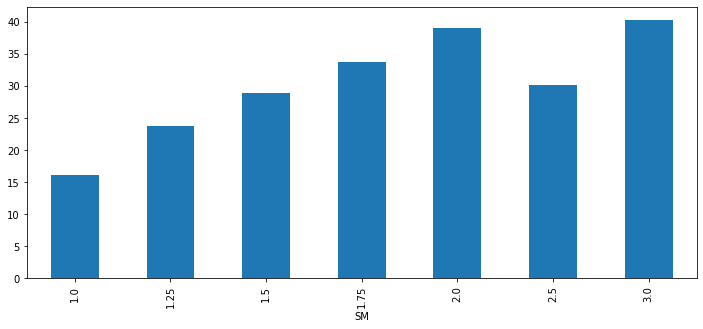

In [314]:
df.groupby(['SM'])['Fare'].mean().plot(kind = 'bar', x='SM', y='Fare', figsize=(12,5));

(16.4, 16.7)

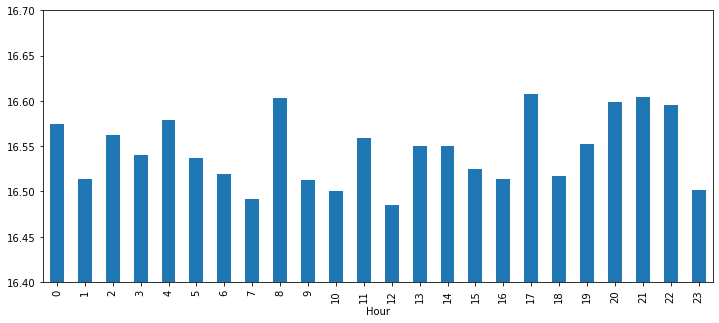

In [332]:
df.groupby(['Hour'])['Fare'].mean().plot(kind = 'bar', x='Hour', y='Fare', figsize=(12,5))
plt.ylim(ymin=16.4, ymax= 16.7) 

In [386]:
dfresult = pd.DataFrame(data={'Route':[''],'Taxi':[''],'Service':[''],'Fare':['']}, columns=['Route','Taxi','Service','Fare'])
index = 0
for source in df['Source'].unique():
    for destination in df['Destination'].unique():
        dftarget = df.loc[(df['Source'] == source) & (df['Destination'] == destination)]
        for taxi in dftarget['Taxi'].unique():
            dftarget2 = dftarget.loc[dftarget['Taxi'] == taxi]
            for service in dftarget2['Service'].unique():
                dftarget3=dftarget2.loc[dftarget2['Service'] == service]
                
                dfresult.at[index,'Route'] = source + ' ==> ' + destination
                dfresult.at[index,'Taxi'] = taxi
                dfresult.at[index,'Service'] = service
                dfresult.at[index,'Fare'] = round(dftarget3['Fare'].mean(),2)
                index=index+1
            index=index+1
        index=index+1
    index=index+1

dfresult.drop( dfresult.loc[dfresult['Service'] == 'Uber D'].index ,inplace=True)
dfresult.drop( dfresult.loc[dfresult['Service'] == 'Lyft 2'].index ,inplace=True)
dfresult = dfresult.sort_values(['Route', 'Taxi','Service'], ascending=[True, True, True])
dfresult = dfresult.reset_index(drop=True)
dfresult

,Route,Taxi,Service,Fare
0,Back Bay ==> Boston University,Lyft,Lyft 0,4.91
1,Back Bay ==> Boston University,Lyft,Lyft 1,8.02
2,Back Bay ==> Boston University,Lyft,Lyft 1.5,13.69
3,Back Bay ==> Boston University,Lyft,Lyft 3,19.52
4,Back Bay ==> Boston University,Lyft,Lyft 3.5,28.83
5,Back Bay ==> Boston University,Uber,Uber 0,7.72
6,Back Bay ==> Boston University,Uber,Uber 1,8.43
7,Back Bay ==> Boston University,Uber,Uber 1.5,13.06
8,Back Bay ==> Boston University,Uber,Uber 3,16.32
9,Back Bay ==> Boston University,Uber,Uber 3.5,25.34


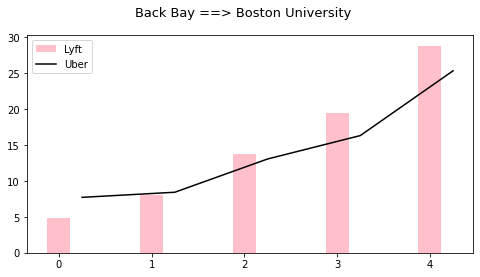

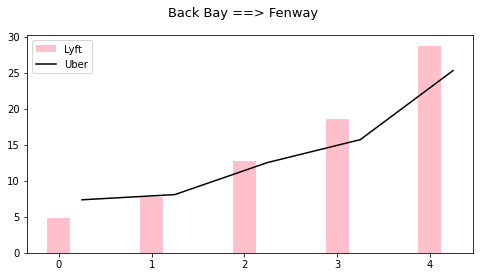

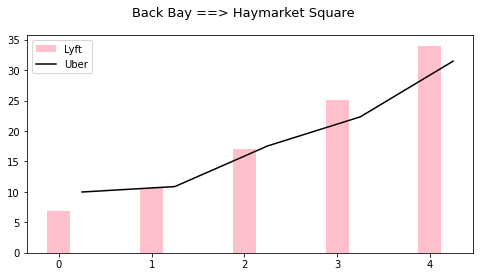

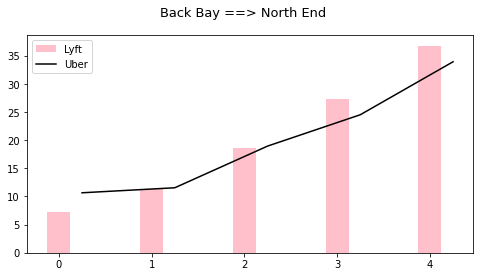

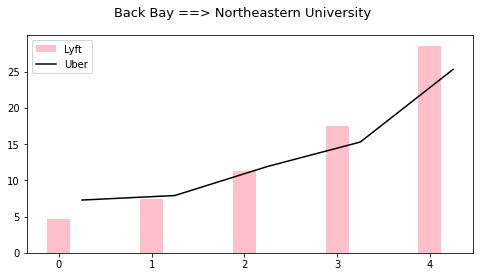

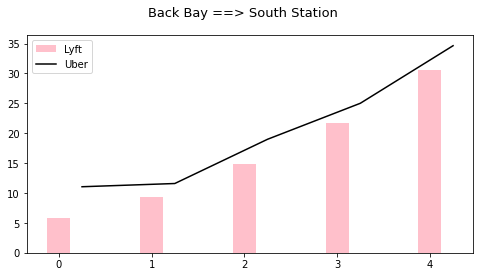

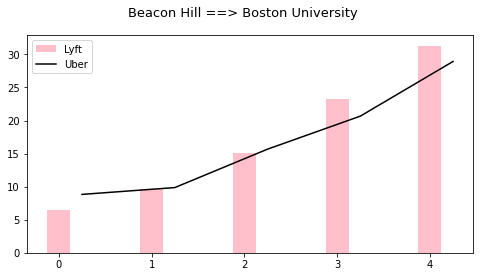

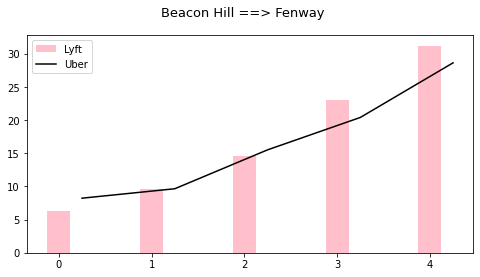

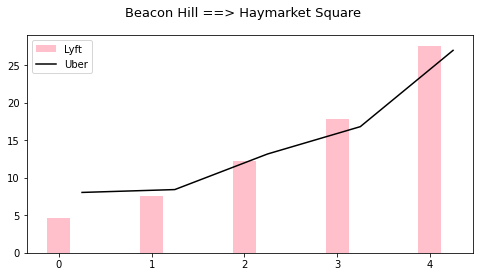

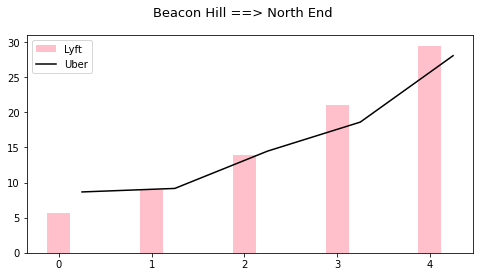

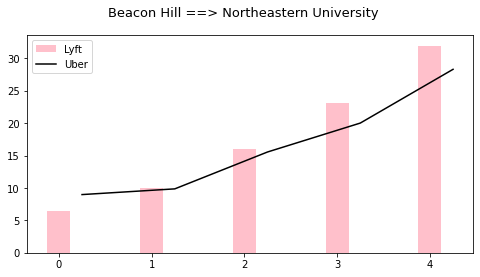

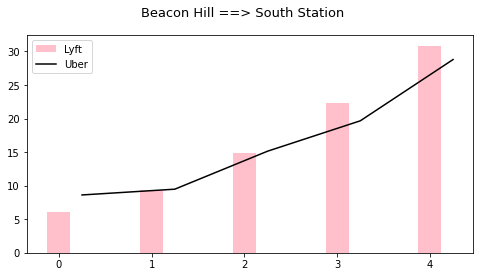

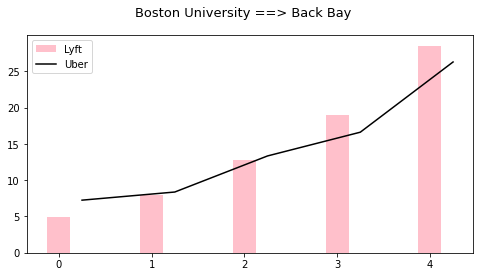

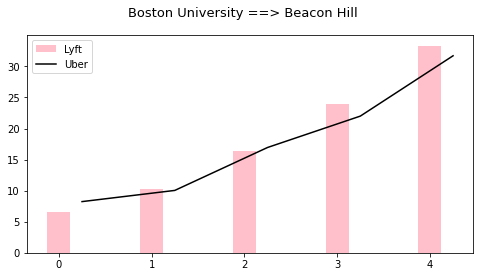

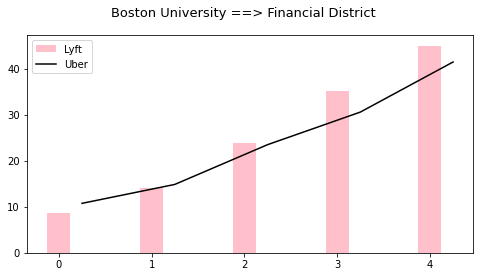

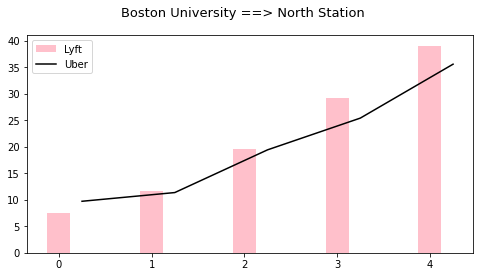

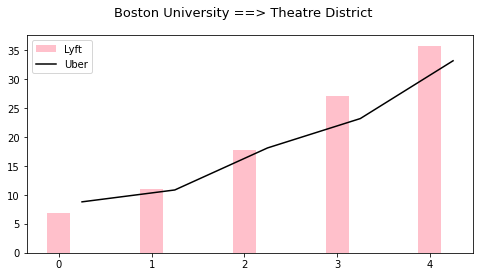

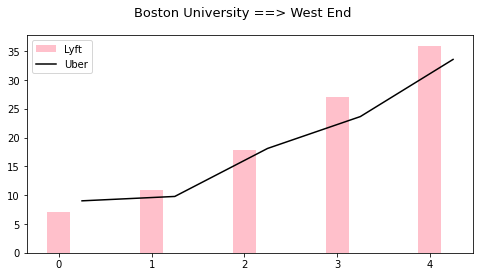

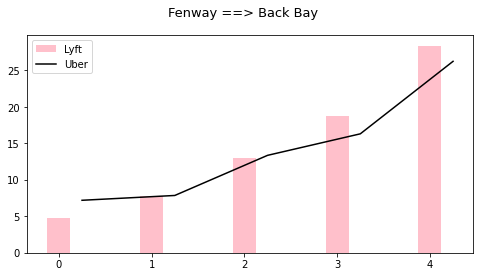

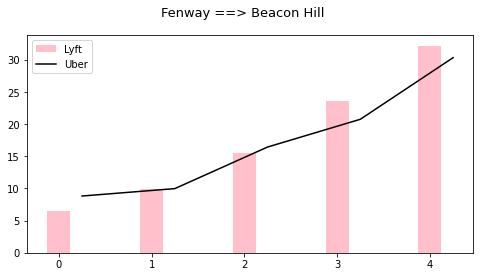

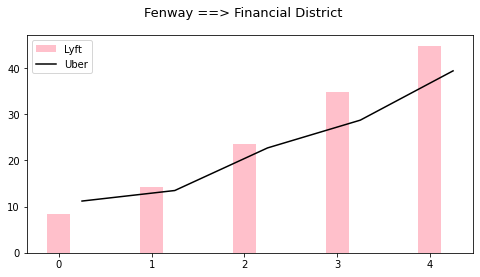

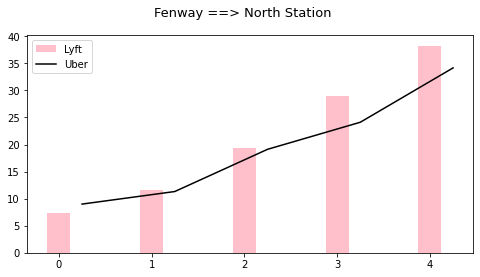

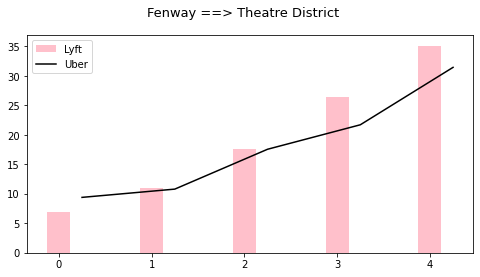

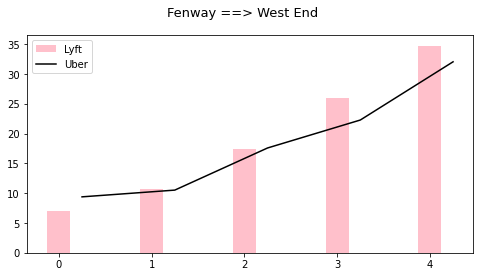

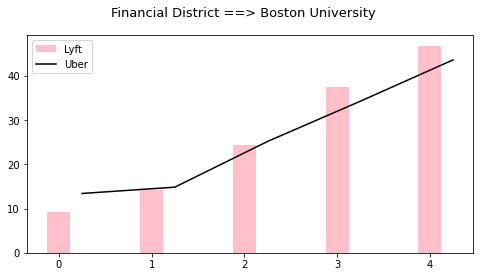

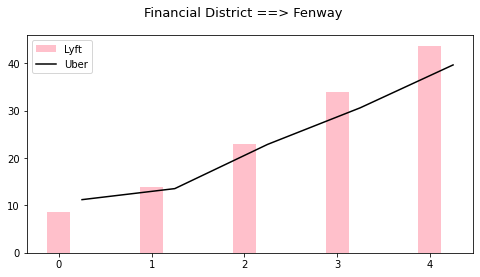

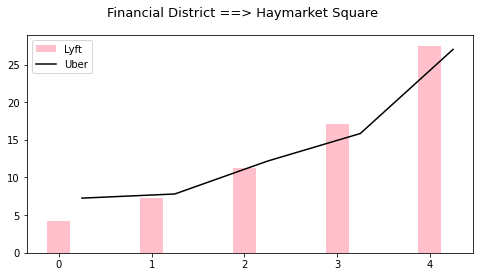

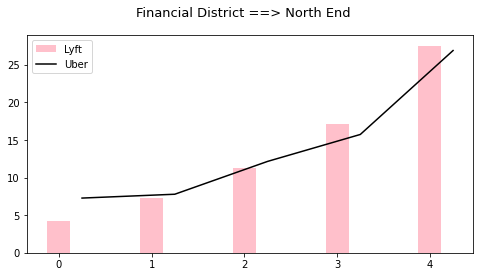

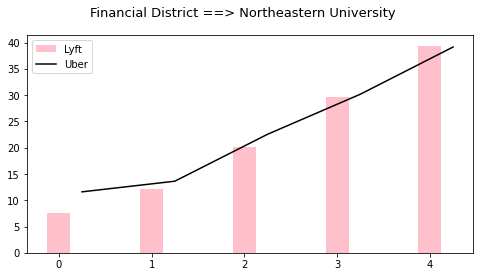

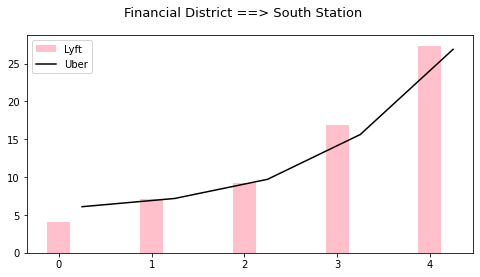

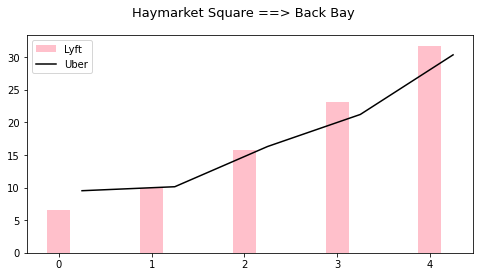

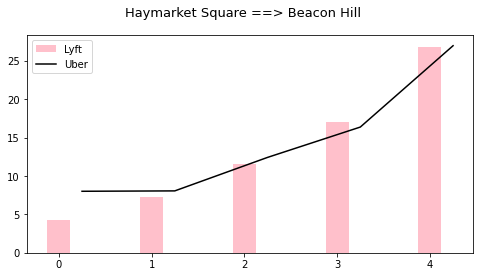

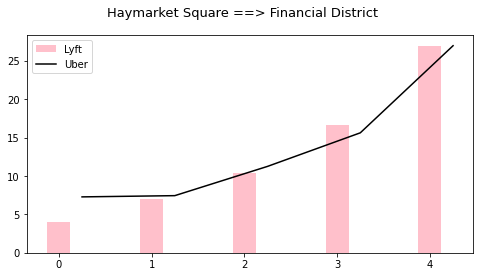

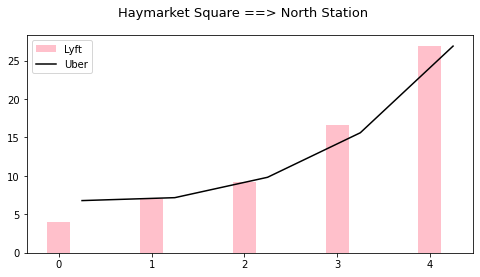

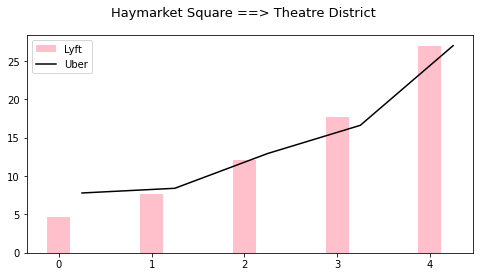

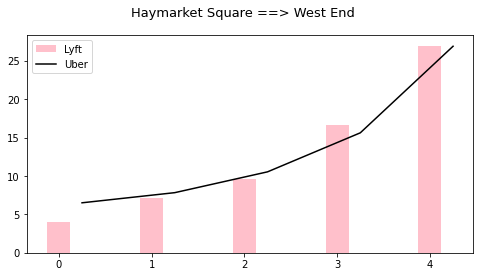

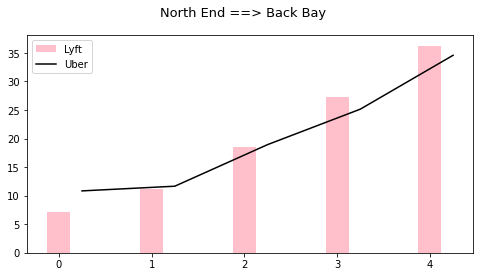

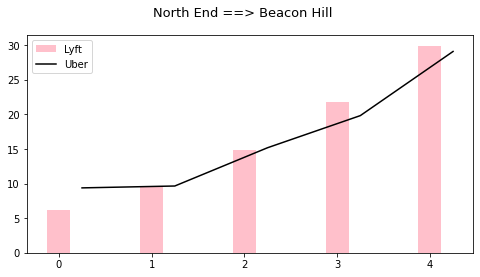

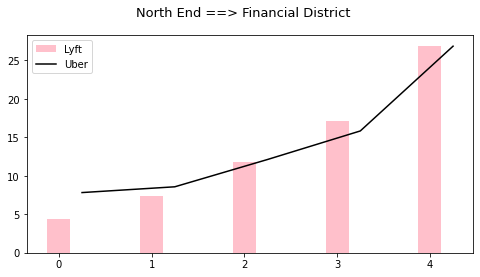

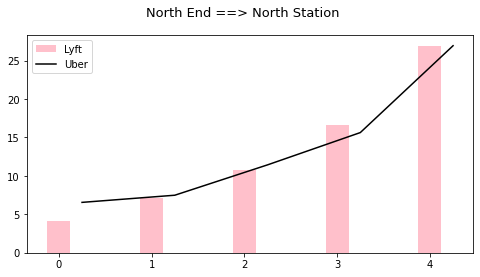

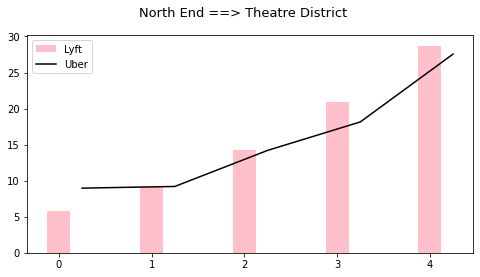

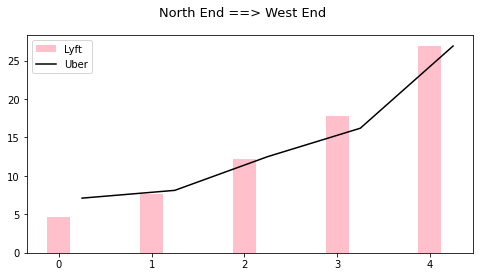

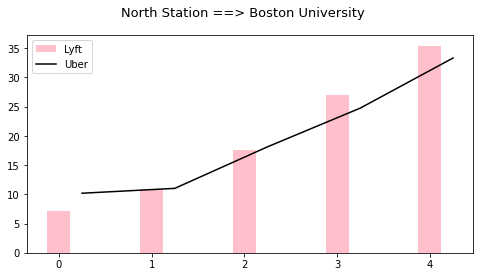

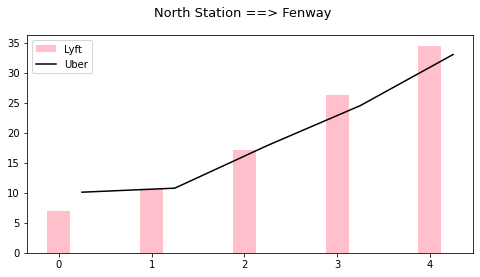

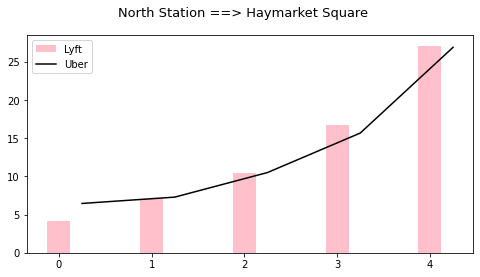

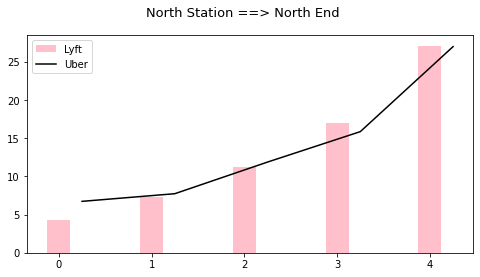

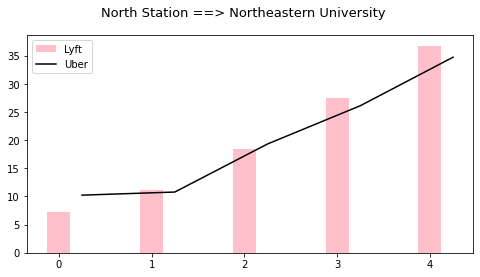

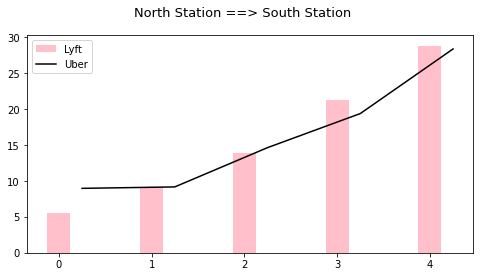

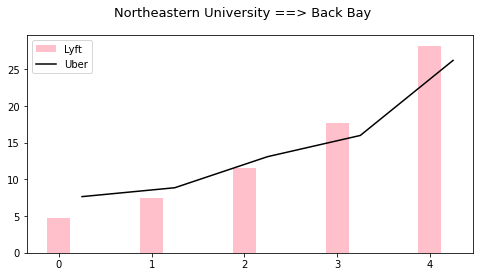

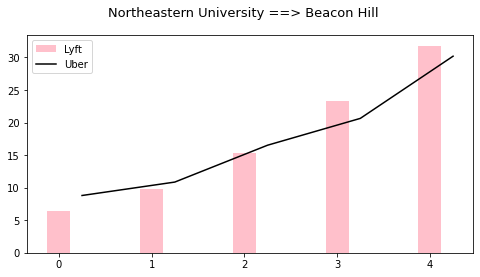

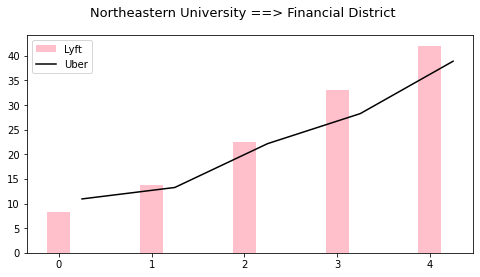

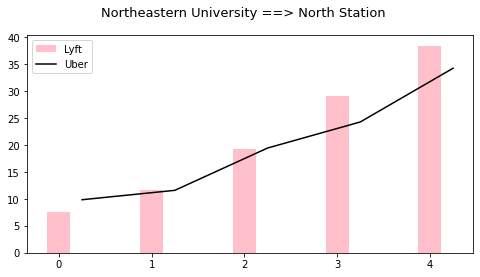

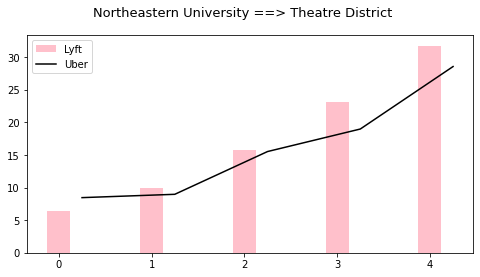

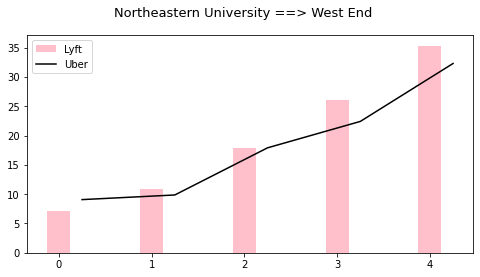

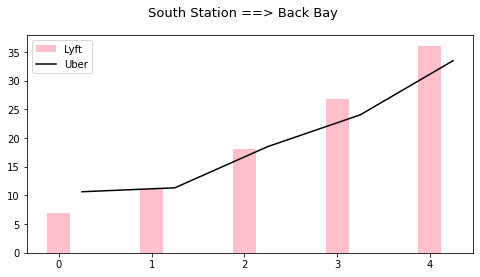

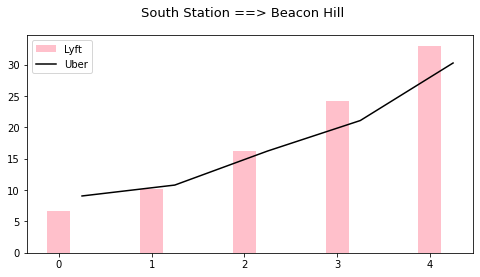

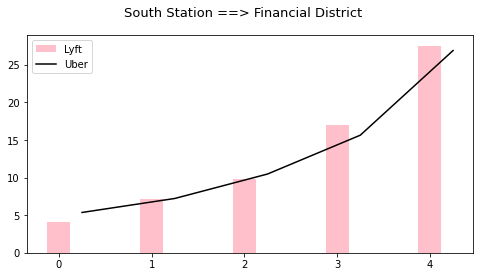

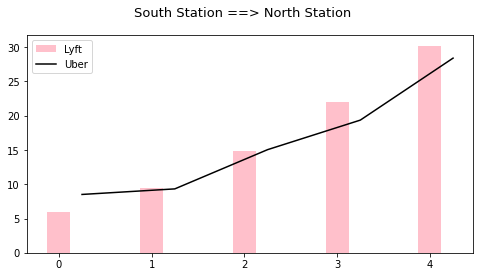

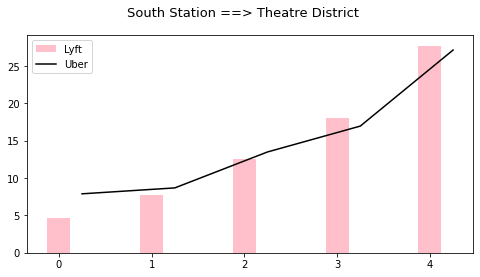

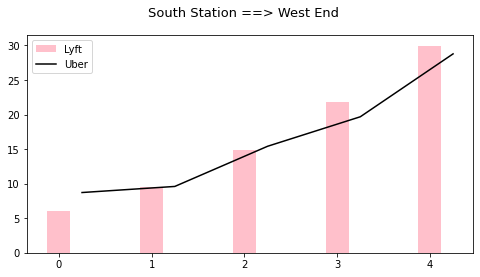

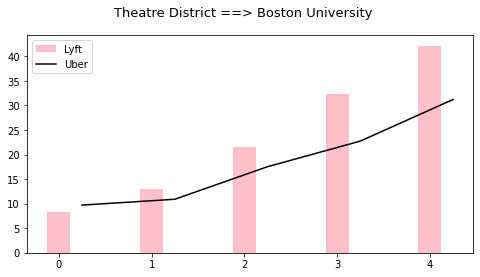

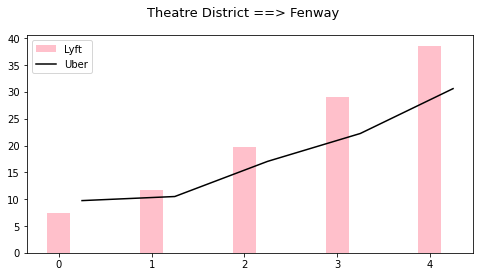

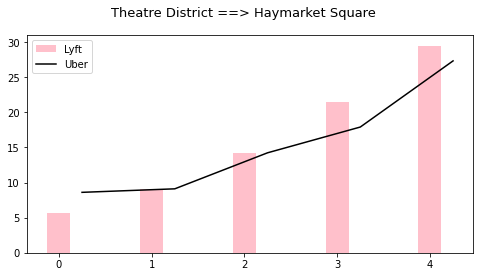

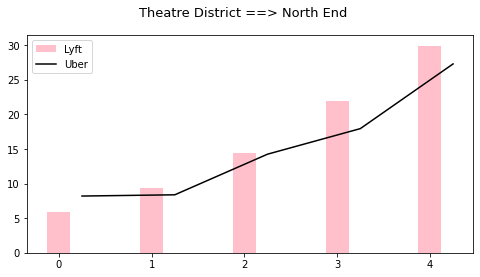

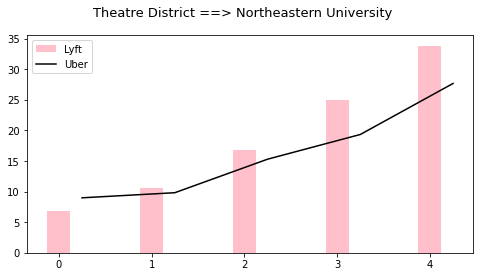

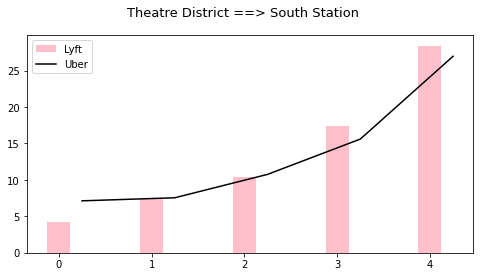

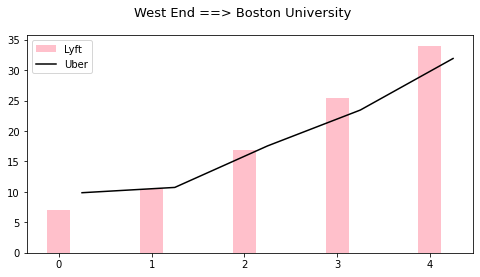

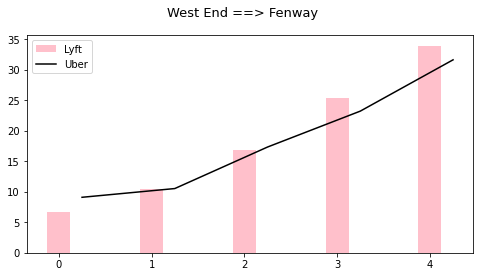

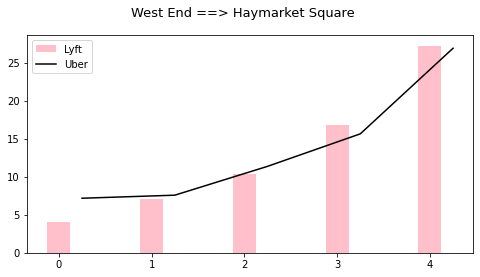

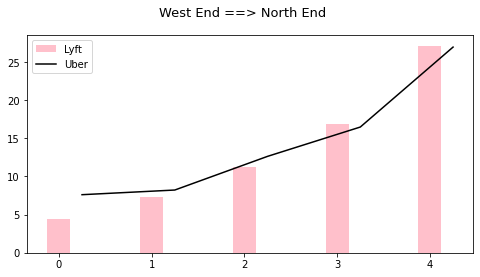

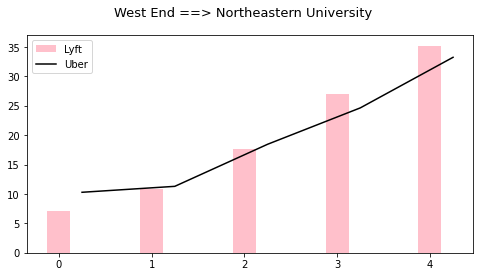

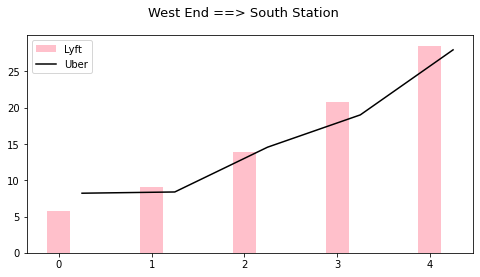

In [391]:
for Route in dfresult['Route'].unique():
    Lyft=dfresult.loc[(dfresult['Route']==Route)&(dfresult['Taxi']=='Lyft')]['Fare'].reset_index(drop=True)
    Uber=dfresult.loc[(dfresult['Route']==Route)&(dfresult['Taxi']=='Uber')]['Fare'].reset_index(drop=True)
    df2 = pd.concat([Lyft, Uber], axis=1, keys=['Lyft', 'Uber'])
    ind = df2.index  
    width = 0.25    
    fig, ax = plt.subplots(figsize=(8, 4))
    rects1 = ax.bar(ind, df2['Lyft'], width, color='pink' )
    rects2 = ax.plot(ind+width, df2['Uber'], width, color='black')
    ax.legend( (rects1[0], rects2[0]), ('Lyft', 'Uber'), loc='upper left' )
    fig.suptitle(Route, fontsize=13)
    plt.show()


In [400]:
df.head(3)

,Time,WeekDay,Hour,Source,Destination,Distance(km),Taxi,Service,Fare,SM,Lat,Lon,Summary,Temp(c),TempHigh(c),TempHighTime,TempLow(c),TempLowTime,Rainfall(mm/h),Precipitation(%),Humidity(%),WindSpeed(km/h),Visibility(km),Sunrise,Sunset
0,2018-11-26 03:40:46,Monday,3,Beacon Hill,Boston University,3.7,Lyft,Lyft 1,9.0,1.0,42.3429,-71.1003,fog,5.46,6.21,2018-11-25 23:00:00,4.01,2018-11-26 12:00:00,0.0,0.0,92.0,1.0,3.0,2018-11-25 11:48:59,2018-11-25 21:16:57
1,2018-11-26 03:40:46,Monday,3,Beacon Hill,Boston University,3.7,Lyft,Lyft 0,3.5,1.0,42.3429,-71.1003,fog,5.46,6.21,2018-11-25 23:00:00,4.01,2018-11-26 12:00:00,0.0,0.0,92.0,1.0,3.0,2018-11-25 11:48:59,2018-11-25 21:16:57
2,2018-11-26 03:40:46,Monday,3,Beacon Hill,Boston University,3.7,Lyft,Lyft 2,16.5,1.0,42.3429,-71.1003,fog,5.46,6.21,2018-11-25 23:00:00,4.01,2018-11-26 12:00:00,0.0,0.0,92.0,1.0,3.0,2018-11-25 11:48:59,2018-11-25 21:16:57


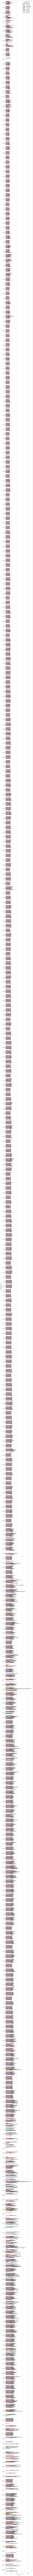

In [460]:
fig, ax = plt.subplots(figsize=(5, 500))
sns.barplot(y="Distance(km)", x="Fare", hue='WeekDay', data=df, orient='h');